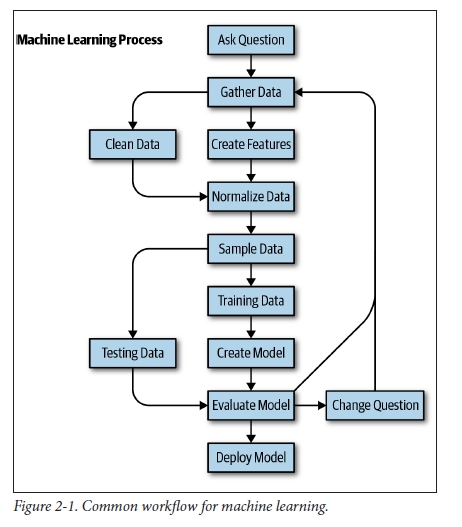

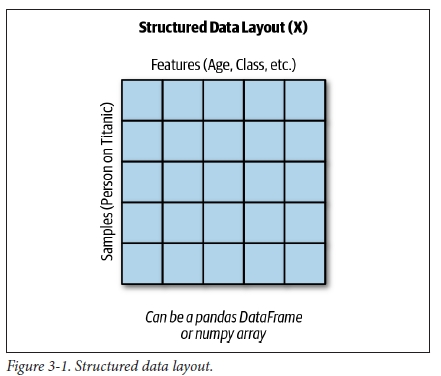

In [1]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Titanic Dataset

## Import dataset

In [2]:
url = "https://biostat.app.vumc.org/wiki/pub/Main/DataSets/titanic3.xls"
df = pd.read_excel(url)
orig_df = df.copy()
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


# Clean Data

In [3]:
df.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

## Profile Report

In [3]:
import pandas_profiling
#pandas_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/28 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
df.shape

(1309, 14)

In [5]:
df.describe().iloc[:, :2]

,pclass,survived
count,1309.000000,1309.000000
mean,2.294882,0.381971
std,0.837836,0.486055
min,1.000000,0.000000
25%,2.000000,0.000000
50%,3.000000,0.000000
75%,3.000000,1.000000
max,3.000000,1.000000


In [7]:
df[['pclass','survived']].describe()

,pclass,survived
count,1309.000000,1309.000000
mean,2.294882,0.381971
std,0.837836,0.486055
min,1.000000,0.000000
25%,2.000000,0.000000
50%,3.000000,0.000000
75%,3.000000,1.000000
max,3.000000,1.000000


In [8]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [9]:
df.isnull().mean() * 100

pclass        0.000000
survived      0.000000
name          0.000000
sex           0.000000
age          20.091673
sibsp         0.000000
parch         0.000000
ticket        0.000000
fare          0.076394
cabin        77.463713
embarked      0.152788
boat         62.872422
body         90.756303
home.dest    43.086325
dtype: float64

## Visualize missing data

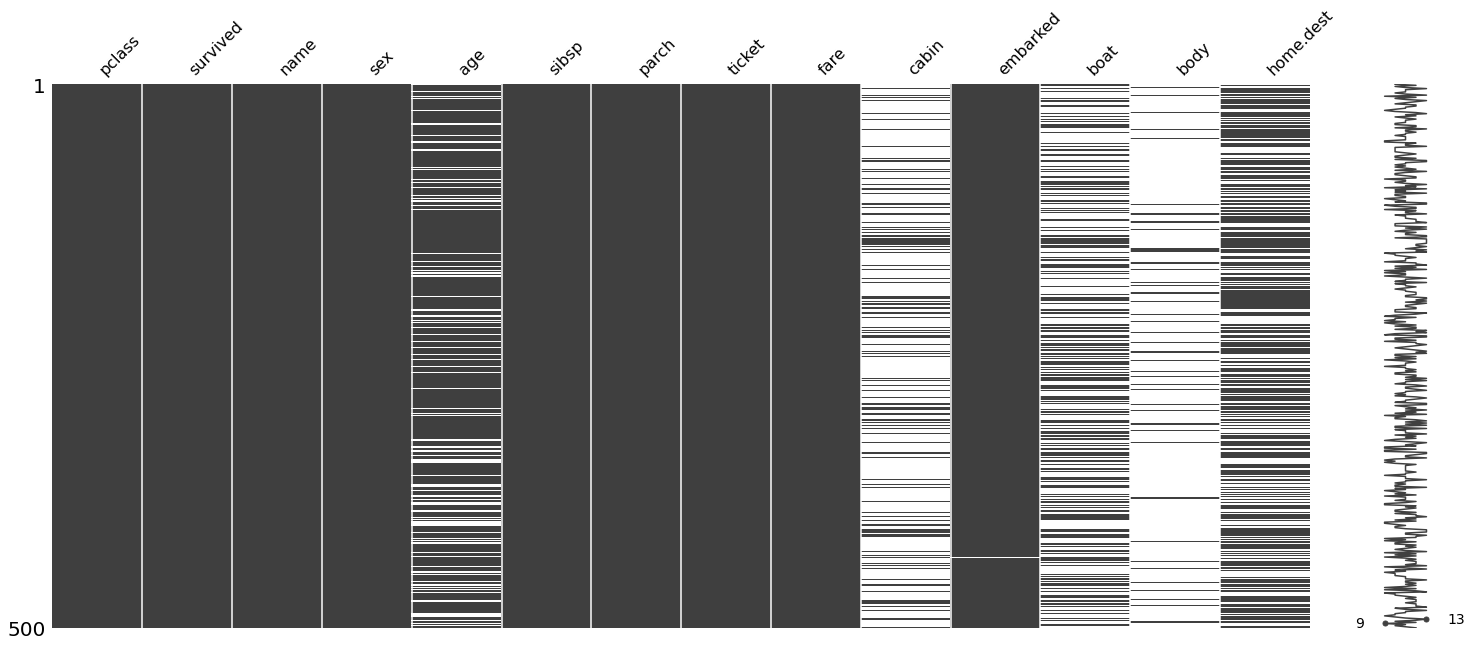

In [10]:
import missingno as msno

ax = msno.matrix(df.sample(500))

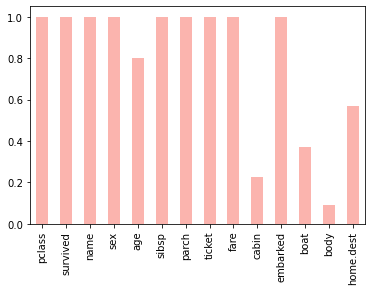

In [11]:
#https://matplotlib.org/2.0.2/examples/color/colormaps_reference.html
fig, ax = plt.subplots(figsize=(6, 4))
(1 - df.isnull().mean()).abs().plot.bar(ax=ax, colormap='Pastel1');

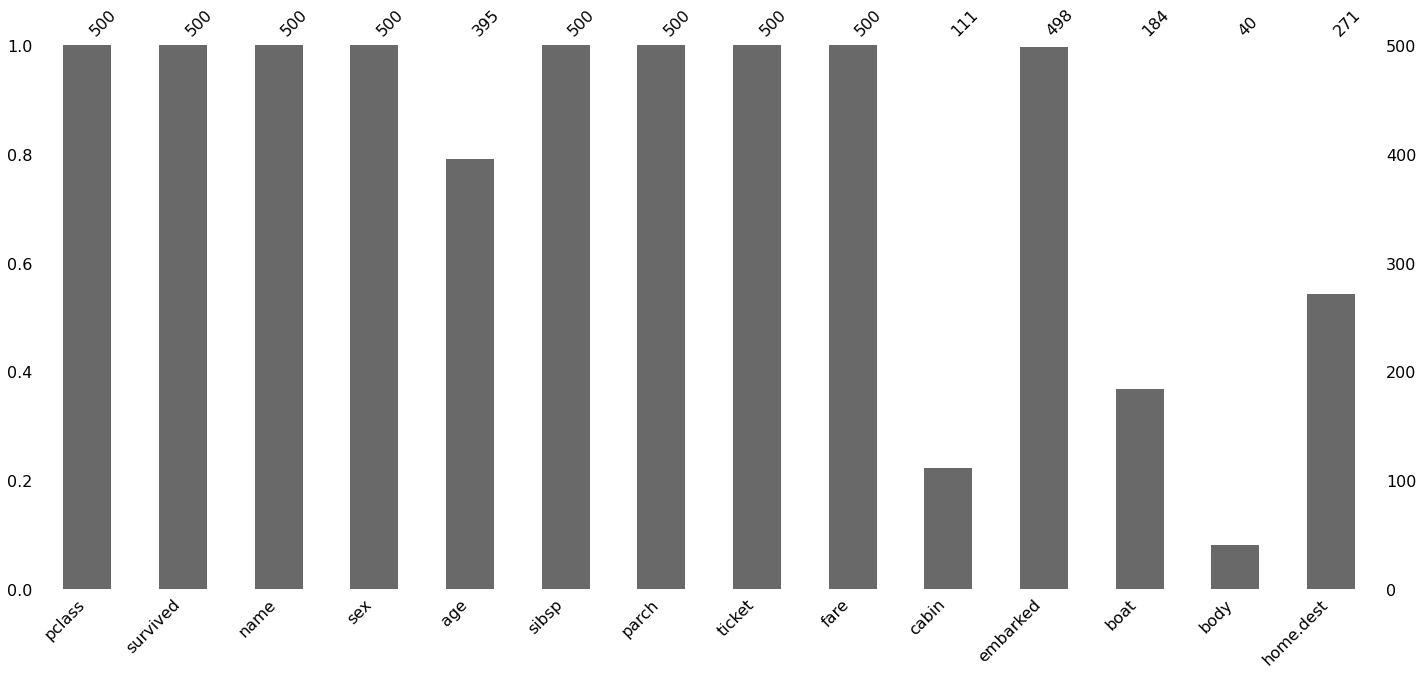

In [12]:
ax = msno.bar(df.sample(500))

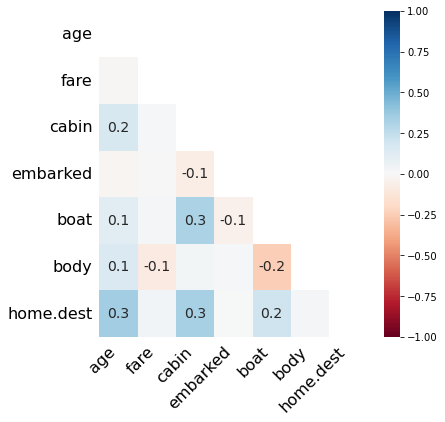

In [13]:
ax = msno.heatmap(df, figsize=(6, 6))

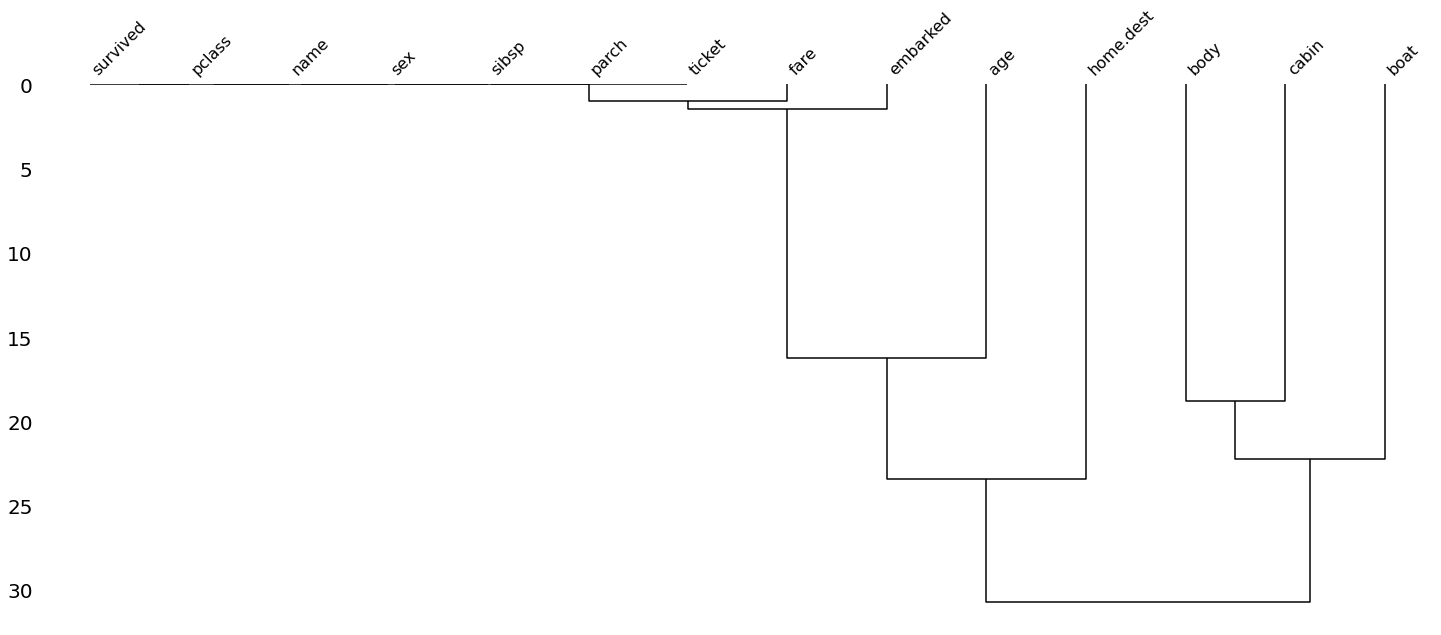

In [14]:
ax = msno.dendrogram(df)

In [15]:
df.sex.value_counts(dropna=False)

male      843
female    466
Name: sex, dtype: int64

In [18]:
df.embarked.value_counts(dropna=False)

S      914
C      270
Q      123
NaN      2
Name: embarked, dtype: int64

# Create Features

## Drop Columns

In [19]:
df = df.drop(columns=["name","ticket","home.dest","boat", "body", "cabin",])
df.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,female,29.0000,0,0,211.3375,S
1,1,1,male,0.9167,1,2,151.5500,S
2,1,0,female,2.0000,1,2,151.5500,S
3,1,0,male,30.0000,1,2,151.5500,S
4,1,0,female,25.0000,1,2,151.5500,S


## Create Dummies
We need to create dummy columns from string columns. This will create new columns for sex and embarked. Pandas has a convenient get_dummies function for that:

In [20]:
df = pd.get_dummies(df)
df.head()

,pclass,survived,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,1,1,29.0000,0,0,211.3375,1,0,0,0,1
1,1,1,0.9167,1,2,151.5500,0,1,0,0,1
2,1,0,2.0000,1,2,151.5500,1,0,0,0,1
3,1,0,30.0000,1,2,151.5500,0,1,0,0,1
4,1,0,25.0000,1,2,151.5500,1,0,0,0,1


In [21]:
df = df.drop(columns="sex_male")

In [22]:
df.columns

Index(['pclass', 'survived', 'age', 'sibsp', 'parch', 'fare', 'sex_female',
       'embarked_C', 'embarked_Q', 'embarked_S'],
      dtype='object')

In [27]:
df1 = orig_df.drop(columns=["name","ticket","home.dest","boat", "body", "cabin",])
df1 = pd.get_dummies(df1, drop_first=True)

In [28]:
df1.columns

Index(['pclass', 'survived', 'age', 'sibsp', 'parch', 'fare', 'sex_male',
       'embarked_Q', 'embarked_S'],
      dtype='object')

In [33]:
X = df.drop(columns="survived")
y = df.survived

# Sample Data

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                        test_size=0.3, random_state=42)

# Impute Data

In [36]:
from sklearn.experimental import enable_iterative_imputer
from sklearn import impute

In [37]:
num_cols = ["pclass", "age", "sibsp", "parch", "fare", "sex_female"]
imputer = impute.IterativeImputer()

In [38]:
imputed = imputer.fit_transform(X_train[num_cols])
X_train.loc[:, num_cols] = imputed

In [39]:
X_train.isna().sum()

pclass        0
age           0
sibsp         0
parch         0
fare          0
sex_female    0
embarked_C    0
embarked_Q    0
embarked_S    0
dtype: int64

In [40]:
imputed = imputer.fit_transform(X_test[num_cols])
X_test.loc[:, num_cols] = imputed

In [41]:
X_test.isna().sum()

pclass        0
age           0
sibsp         0
parch         0
fare          0
sex_female    0
embarked_C    0
embarked_Q    0
embarked_S    0
dtype: int64

In [27]:
# Using pandas to impute median
meds = X_train.median()
X_train = X_train.fillna(meds)
meds = X_test.median()
X_test = X_test.fillna(meds)

# Normalize Data

In [42]:
sca = StandardScaler()
X_train = sca.fit_transform(X_train)
X_test = sca.fit_transform(X_test)

# Refactor

In [43]:
def tweak_titanic(df):
    df = df.drop(columns=["name","ticket","home.dest","boat","body",
                          "cabin"]).pipe(pd.get_dummies)
    return df

def get_train_test_X_y(df, y_col, size=0.3, std_cols=None):
    y = df[y_col]
    X = df.drop(columns=y_col)
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                        test_size=size, random_state=42)
    
    cols = X.columns
    num_cols = ["pclass", "age", "sibsp", "parch", "fare",]
    
    fi = impute.IterativeImputer()
    X_train.loc[:, num_cols] = fi.fit_transform(X_train[num_cols])
    X_test.loc[:, num_cols] = fi.fit_transform(X_test[num_cols])

    if std_cols:
        std = StandardScaler()
        X_train.loc[:, std_cols] = std.fit_transform(X_train[std_cols])
        X_test.loc[:, std_cols] = std.fit_transform(X_test[std_cols])
    return X_train, X_test, y_train, y_test

In [44]:
ti_df = tweak_titanic(orig_df)
std_cols = ["pclass","age","sibsp","fare"]
X_train, X_test, y_train, y_test =get_train_test_X_y(ti_df, 
                        "survived", std_cols=std_cols)

# Baseline Model

In [46]:
from sklearn.dummy import DummyClassifier
bm = DummyClassifier()
bm.fit(X_train, y_train)
bm.score(X_train, y_train) # accuracy

0.5425764192139738

In [47]:
bm.score(X_test, y_test) # accuracy

0.5190839694656488

In [52]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42,
                            max_depth=3)

clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [53]:
clf.score(X_train, y_train) # accuracy

0.8155021834061136

In [54]:
clf.score(X_test, y_test)

0.811704834605598

In [55]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [56]:
y_pred = clf.predict(X_test)

In [57]:
confusion_matrix(y_test, clf.predict(X_test))

array([[199,  25],
       [ 49, 120]], dtype=int64)

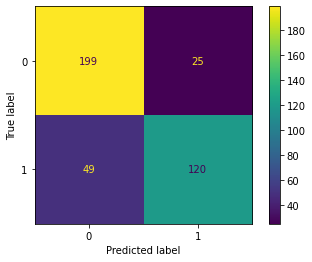

In [58]:
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

In [59]:
pd.DataFrame(confusion_matrix(y_test, clf.predict(X_test)),
    columns=["Predict died", "Predict Survive",],
    index=["True Death", "True Survive"],)

,Predict died,Predict Survive
True Death,199,25
True Survive,49,120


In [60]:
from yellowbrick.classifier import ConfusionMatrix

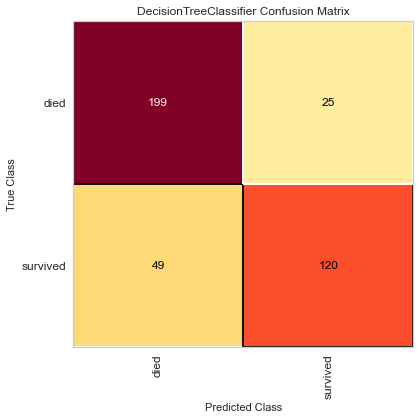

<AxesSubplot:title={'center':'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [61]:
mapping = {0: "died", 1: "survived"}
fig, ax = plt.subplots(figsize=(6, 6))
cm_viz = ConfusionMatrix(clf,
    classes=["died", "survived"],
    label_encoder=mapping,)
cm_viz.score(X_test, y_test)
cm_viz.poof()

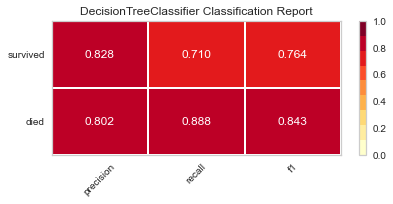

<AxesSubplot:title={'center':'DecisionTreeClassifier Classification Report'}>

In [62]:
from yellowbrick.classifier import ClassificationReport

fig, ax = plt.subplots(figsize=(6, 3))
cm_viz = ClassificationReport(clf,
    classes=["died", "survived"],
    label_encoder=mapping,)
cm_viz.score(X_test, y_test)
cm_viz.poof()

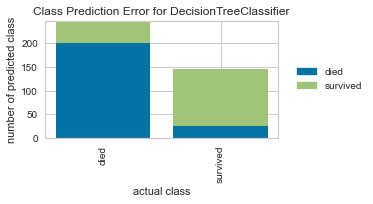

<AxesSubplot:title={'center':'Class Prediction Error for DecisionTreeClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [63]:
from yellowbrick.classifier import ClassPredictionError

fig, ax = plt.subplots(figsize=(6, 3))
cpe_viz = ClassPredictionError(
    clf, classes=["died", "survived"])

cpe_viz.score(X_test, y_test)
cpe_viz.poof()

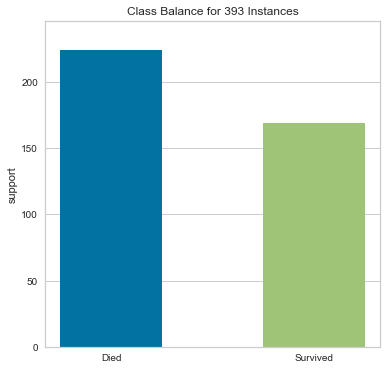

<AxesSubplot:title={'center':'Class Balance for 393 Instances'}, ylabel='support'>

In [64]:
from yellowbrick.classifier import ClassBalance

fig, ax = plt.subplots(figsize=(6, 6))
cb_viz = ClassBalance(
    labels=["Died", "Survived"])

cb_viz.fit(y_test)
cb_viz.poof()